In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("jialinyi/icml-2023")
            

## Synthetic data
### FedExp v.s. Exp3

In [59]:
synthetic = pd.DataFrame(columns=['_step', 'mean', 'algo'])
for run in runs: 
    if run.config['env'] == 'HalfActBandit-0':
        history = run.scan_history(keys=['_step', 'mean'])
        for row in history:
            if run.config['network'] == 'GRID':
                row['algo'] = 'FedExp3'
            elif run.config['network'] == 'NONE':
                row['algo'] = 'Exp3'
            else:
                continue
            new_pd = pd.DataFrame([row])
            synthetic = pd.concat([synthetic, new_pd], axis=0, ignore_index=True)

In [60]:
synthetic

,_step,mean,algo
0,0,0.282407,FedExp3
1,1,0.509259,FedExp3
2,2,0.748457,FedExp3
3,3,0.983796,FedExp3
4,4,1.199846,FedExp3
...,...,...,...
59995,2995,68.971642,Exp3
59996,2996,68.972412,Exp3
59997,2997,68.972412,Exp3
59998,2998,68.972412,Exp3


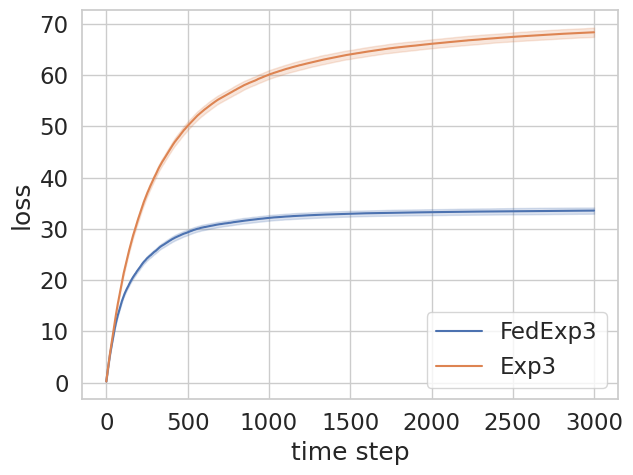

In [73]:
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.lineplot(data=synthetic, x='_step', y='mean', hue='algo', errorbar='sd')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel='time step', ylabel='loss')
plt.tight_layout(pad=.5)
fig = ax.get_figure()
fig.savefig("regret.png", dpi=300)